In [32]:
import bs4 as bs
import pickle
import requests


def save_tickers():
	resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
	soup=bs.BeautifulSoup(resp.text)
	table=soup.find('table',{'class':'wikitable sortable'})
	tickers=[]
	for row in table.findAll('tr')[1:]:
		ticker=row.findAll('td')[0].text[:-1]
		tickers.append(ticker)

	with open("tickers.pickle",'wb') as f:
		pickle.dump(tickers, f)


	return tickers

save_tickers()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA'

In [8]:
#this code helps us to pick the feature adj close column of each stock other
#than our target stock amzn rename the column as the ticker and merge in our feature
import os
import pandas as pd
import pickle
def compile():
    with open("tickers.pickle",'rb') as f:
        tickers=pickle.load(f)
    main_df=pd.DataFrame()
    for count,ticker in enumerate(tickers):
        if'AMZN'in ticker:
            continue
        if not os.path.exists('stock_details/{}.csv'.format(ticker)):
            continue
        df=pd.read_csv('stock_details/{}.csv'.format(ticker))
        df.set_index('Date',inplace=True)
        df.rename(columns={'Adj Close':ticker},inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
        
        if main_df.empty:
            main_df=df
        else:
            main_df=main_df.join(df,how='outer')
    print(main_df.head())
    main_df.to_csv('Dataset_temp.csv')
compile()

                 AOS        ABT  ABBV        ACN       ATVI        ADM  \
Date                                                                     
2009-12-31  4.976070  17.996279   NaN  33.262230   9.956354  23.740429   
2010-01-04  5.115983  18.152946   NaN  33.719078  10.126624  23.861740   
2010-01-05  5.050615  18.006285   NaN  33.927479  10.144546  23.990639   
2010-01-06  5.052907  18.106277   NaN  34.288147  10.090778  23.929979   
2010-01-07  5.067816  18.256275   NaN  34.256084   9.848815  23.679766   

                 ADBE        ADP        AAP        AES  ...   CBRE  CDW  \
Date                                                    ...               
2009-12-31  36.779999  28.884989  39.254593  10.388851  ...  13.57  NaN   
2010-01-04  37.090000  28.891720  39.157616  10.669841  ...  13.82  NaN   
2010-01-05  37.700001  28.736578  38.924889  10.560567  ...  14.15  NaN   
2010-01-06  37.619999  28.669119  39.264290  10.451293  ...  14.03  NaN   
2010-01-07  36.889999  28.65562

In [2]:
import pandas as pd
df_test=pd.read_csv('Dataset_temp.csv')#feature file all stocks exxept amzn
df_test

,Date,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,CBRE,CDW,CE,CF,CB,CHD,C,CFG,CAG,CCI
0,2009-12-31,4.976070,17.996279,NaN,33.262230,9.956354,23.740429,36.779999,28.884989,39.254593,...,13.570000,NaN,27.468046,11.348292,34.461029,11.163175,30.026762,NaN,12.255037,30.937769
1,2010-01-04,5.115983,18.152946,NaN,33.719078,10.126624,23.861740,37.090000,28.891720,39.157616,...,13.820000,NaN,28.460651,11.480803,33.688393,11.327529,30.843197,NaN,12.286939,31.389481
2,2010-01-05,5.050615,18.006285,NaN,33.927479,10.144546,23.990639,37.700001,28.736578,38.924889,...,14.150000,NaN,29.093880,11.667064,32.929432,11.174255,32.022488,NaN,12.340101,31.690609
3,2010-01-06,5.052907,18.106277,NaN,34.288147,10.090778,23.929979,37.619999,28.669119,39.264290,...,14.030000,NaN,29.410486,12.153352,32.478142,11.227811,33.020370,NaN,12.297568,31.238918
4,2010-01-07,5.067816,18.256275,NaN,34.256084,9.848815,23.679766,36.889999,28.655622,39.254593,...,14.170000,NaN,29.564510,12.030843,32.662773,11.102233,33.111080,NaN,12.334788,30.723808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2020-06-16,47.880001,89.739998,96.059998,204.399994,73.000000,40.750000,411.670013,151.779999,142.420059,...,48.369999,119.370003,89.900002,30.809999,129.675430,74.739998,54.450001,27.240000,34.250000,169.589996
2632,2020-06-17,47.689999,90.900002,95.739998,205.199997,75.529999,40.470001,413.489990,150.679993,148.389999,...,47.790001,117.180000,89.059998,30.230000,128.919998,75.370003,53.000000,26.370001,34.299999,169.449997
2633,2020-06-18,47.930000,90.279999,96.230003,202.929993,76.010002,40.580002,420.459991,151.729996,147.710007,...,47.480000,117.239998,88.139999,29.990000,129.649994,77.820000,53.040001,26.150000,34.240002,165.250000
2634,2020-06-19,47.290001,90.680000,96.709999,201.550003,76.580002,40.240002,428.010010,149.000000,144.899994,...,46.740002,116.949997,86.720001,29.889999,127.949997,77.519997,52.919998,25.350000,33.549999,170.449997


In [60]:

ac=list(df_test.columns)
ac

['Date',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'ALL',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BAC',
 'BAX',
 'BDX',
 'BBY',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'CHRW',
 'CDNS',
 'CAH',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CF',
 'CB',
 'CHD',
 'C',
 'CFG',
 'CAG',
 'CCI']

In [19]:
df_test.isnull().sum().sum()

8668

In [21]:
pip install mpl_finance

Note: you may need to restart the kernel to use updated packages.


C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


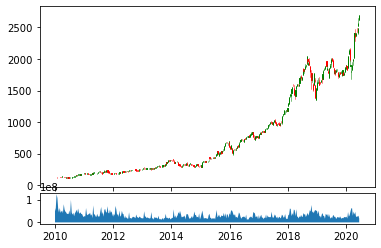

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
df=pd.read_csv('stock_details/AMZN.csv',index_col=0,parse_dates=True)
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)
ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

In [6]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]
while i<len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume']-df.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close']-df.iloc[i-1]['Adj Close'])
    i+=1
    
df['Increase_in_vol']=rate_increase_in_vol
df['Increase_in_adj_close']=rate_increase_in_adj_close

In [7]:
df['Increase_in_vol']

Date
2009-12-31          0.0
2010-01-04    3076900.0
2010-01-05    1252000.0
2010-01-06   -1673100.0
2010-01-07    3851400.0
                ...    
2020-06-16    -279500.0
2020-06-17    -634500.0
2020-06-18    -463300.0
2020-06-19    3285500.0
2020-06-22   -3596839.0
Name: Increase_in_vol, Length: 2636, dtype: float64

In [8]:
df['Increase_in_adj_close']

Date
2009-12-31     0.000000
2010-01-04    -0.620010
2010-01-05     0.790009
2010-01-06    -2.440002
2010-01-07    -2.250000
                ...    
2020-06-16    42.590088
2020-06-17    25.709961
2020-06-18    13.000000
2020-06-19    21.030029
2020-06-22    28.350098
Name: Increase_in_adj_close, Length: 2636, dtype: float64

In [9]:
df

,High,Low,Open,Close,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close
Date,,,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,0.0,0.000000
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,3076900.0,-0.620010
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,1252000.0,0.790009
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,-1673100.0,-2.440002
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,3851400.0,-2.250000
...,...,...,...,...,...,...,...,...
2020-06-16,2620.000000,2576.000000,2620.000000,2615.270020,3585600,2615.270020,-279500.0,42.590088
2020-06-17,2655.000000,2631.820068,2647.500000,2640.979980,2951100,2640.979980,-634500.0,25.709961
2020-06-18,2659.639893,2636.110107,2647.010010,2653.979980,2487800,2653.979980,-463300.0,13.000000


In [10]:
df['Moving_av']= df['Adj Close'].rolling(window=50,min_periods=0).mean()

In [33]:
df#feature file of our target stock('amzn')

,High,Low,Open,Close,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av
Date,,,,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,0.0,0.000000,134.520004
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,3076900.0,-0.620010,134.209999
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,1252000.0,0.790009,134.370000
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,-1673100.0,-2.440002,133.840000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,3851400.0,-2.250000,133.072000
...,...,...,...,...,...,...,...,...,...
2020-06-16,2620.000000,2576.000000,2620.000000,2615.270020,3585600,2615.270020,-279500.0,42.590088,2387.642412
2020-06-17,2655.000000,2631.820068,2647.500000,2640.979980,2951100,2640.979980,-634500.0,25.709961,2400.510212
2020-06-18,2659.639893,2636.110107,2647.010010,2653.979980,2487800,2653.979980,-463300.0,13.000000,2413.357812


In [34]:
import bs4 as bs
import pandas as pd
import requests
import numpy as np



def save_tickers():
	resp=requests.get('https://en.wikipedia.org/wiki/History_of_Amazon')
	soup=bs.BeautifulSoup(resp.text)
	tables=soup.findAll('table',{'class':'wikitable sortable'})
	years=[]
	mds=[]
	events=[]
	dets=[]
	i=0
	for table in tables:
		#print(table)
		#print("**********************************************************************************************")
		if i==0:
			i=1
			continue
		for row in table.findAll('tr')[1:]:
			year=row.findAll('td')[0].text
			if '\n' in year:
				year=year[:-1]
			print(year)
			years.append(year)
			Md=row.findAll('td')[1].text
			if '\n' in Md:
				Md=Md[:-1]
			mds.append(Md)
			event=row.findAll('td')[2].text
			if '\n' in event:
				event=event[:-1]
			events.append(event)
			det=row.findAll('td')[3].text
			if '\n' in det:
				det=det[:-1]
			dets.append(det)
	#print(years)
	#print(mds)
	#print(events)
	#print(dets)
	
	name='Amazon_details.csv'
	year_a=np.array(years)
	md_a=np.array(mds)
	event_a=np.array(events)
	det_a=np.array(dets)
	#long_sp_a=np.array(long_sp)
#		print(len(lat_a))
#		print(len(long_a))
#		print(len(lat_sp_a))
#		print(len(long_sp_a))						

	d={'year':year_a,'Mon_and_day':md_a,'events':event_a,'details':det_a,}
	df=pd.DataFrame(d)
	#df=pd.DataFrame(list(zip(year,Md,events,dets)),columns=['Year','Mon_and_day','Event','Details'])
	df.to_csv(name,index=False)


save_tickers()


1994
1997
1998
1998
1998
2002
2002
2003
2003
2004
2005
2005
2006
2006
2006
2006
2007
2007
2007
2007
2009
2009
2010
2010
2010
2011
2011
2011
2011
2011
2011
2011
2012
2012
2012
2012
2013
2013
2014
2014
2014
2014
2014
2015
2015
2015
2015
2015
2016
2017
2017
2018
2018
2018
2018
2018
2019
2019


In [14]:
import pandas as pd
r=pd.read_csv('Amazon_details.csv')
r

,year,Mon_and_day,events,details
0,1994,July 4,Company,Amazon founded.[89]
1,1997,May 15,Company,"Amazon IPOs at $18.00/share, raising $54 milli..."
2,1998,April 27,Acquisitions,"Amazon acquires the Internet Movie Database, a..."
3,1998,August 5,Company Direction,Amazon announces that it will move beyond book...
4,1998,December,Competition,"Jack Ma launches Alibaba in China, which would..."
5,2002,January,Product,"Amazon launches Free Super Saver Shipping, whi..."
6,2002,March,"Legal, Competition",Amazon settles its October 1999 patent infring...
7,2003,October,Product,"Amazon launches A9.com, a subsidiary of Amazon..."
8,2003,December,Company,First profit announced.[96]
9,2004,August 19,International,"Amazon acquires Joyo, an online bookstore in C..."


In [11]:

df.reset_index(level=0, inplace=True)
df.rename(columns={"index": "new_index"}, inplace=True)
df

,Date,High,Low,Open,Close,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av
0,2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,0.0,0.000000,134.520004
1,2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,3076900.0,-0.620010,134.209999
2,2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,1252000.0,0.790009,134.370000
3,2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,-1673100.0,-2.440002,133.840000
4,2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,3851400.0,-2.250000,133.072000
...,...,...,...,...,...,...,...,...,...,...
2631,2020-06-16,2620.000000,2576.000000,2620.000000,2615.270020,3585600,2615.270020,-279500.0,42.590088,2387.642412
2632,2020-06-17,2655.000000,2631.820068,2647.500000,2640.979980,2951100,2640.979980,-634500.0,25.709961,2400.510212
2633,2020-06-18,2659.639893,2636.110107,2647.010010,2653.979980,2487800,2653.979980,-463300.0,13.000000,2413.357812
2634,2020-06-19,2697.429932,2659.000000,2678.080078,2675.010010,5773300,2675.010010,3285500.0,21.030029,2425.998013


In [50]:
df.to_csv('dataset_target_2.csv',index=False)

In [12]:
read=pd.read_csv('dataset_target_2.csv')
read

,Date,High,Low,Open,Close,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av
0,2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,0.0,0.000000,134.520004
1,2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,3076900.0,-0.620010,134.209999
2,2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,1252000.0,0.790009,134.370000
3,2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,-1673100.0,-2.440002,133.840000
4,2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,3851400.0,-2.250000,133.072000
...,...,...,...,...,...,...,...,...,...,...
2631,2020-06-16,2620.000000,2576.000000,2620.000000,2615.270020,3585600,2615.270020,-279500.0,42.590088,2387.642412
2632,2020-06-17,2655.000000,2631.820068,2647.500000,2640.979980,2951100,2640.979980,-634500.0,25.709961,2400.510212
2633,2020-06-18,2659.639893,2636.110107,2647.010010,2653.979980,2487800,2653.979980,-463300.0,13.000000,2413.357812
2634,2020-06-19,2697.429932,2659.000000,2678.080078,2675.010010,5773300,2675.010010,3285500.0,21.030029,2425.998013


In [13]:
df_copy

NameError: name 'df_copy' is not defined

In [15]:
df_copy.drop(columns=['Increase_in_vol', 'Increase_in_adj_close','Moving_av'], inplace=True)
df_copy

NameError: name 'df_copy' is not defined

In [16]:
df_copy.to_csv('dataset_target.csv',index=False)

NameError: name 'df_copy' is not defined

In [55]:
import pandas as pd


def merge():
	df1=pd.read_csv('dataset_target_2.csv',index_col='Date')

	df3=pd.read_csv('dataset_target.csv')
	df2=pd.read_csv('Dataset_temp.csv',index_col='Date')

	Dates=[]
	i=0
	while i<len(df3):
		Dates.append(df3.iloc[i]['Date'])
		i+=1
		
	
	df_new=df1.join(df2,how='outer')
	df_new.fillna(0.0)

	df_new['Date']=Dates

	df_new.to_csv('Dataset_main.csv',index=False)

merge()

In [17]:
import pandas as pd
read_main=pd.read_csv('Dataset_main.csv')
read_main

,High,Low,Open,Close,Volume,Adj Close,Moving_av,Increase_in_vol,Increase_in_adj_close,MMM,...,FITB,FE,FRC,FISV,FLT,FLIR,FLS,FMC,F,Date
0,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,134.520004,0.0,0.000000,62.630104,...,7.566624,28.292646,NaN,12.120000,NaN,28.875170,27.075947,20.882460,7.041203,2009-12-31
1,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,134.209999,3076900.0,-0.620010,62.895260,...,7.853767,28.487560,NaN,12.357500,NaN,28.795774,27.786289,21.279438,7.238358,2010-01-04
2,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,134.370000,1252000.0,0.790009,62.501301,...,8.063307,28.170828,NaN,12.410000,NaN,28.866356,28.095625,21.208284,7.717158,2010-01-05
3,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,133.840000,-1673100.0,-2.440002,63.387695,...,8.109871,28.475370,NaN,12.357500,NaN,28.936930,28.871838,21.414259,8.005848,2010-01-06
4,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,133.072000,3851400.0,-2.250000,63.433144,...,8.598791,28.049007,NaN,12.300000,NaN,28.972227,29.665247,21.148357,8.210042,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2620.000000,2576.000000,2620.000000,2615.270020,3585600,2615.270020,2387.642412,-279500.0,42.590088,159.669998,...,22.040001,40.509998,111.080002,103.320000,262.410004,43.130001,29.480251,100.419998,6.550000,2020-06-16
2632,2655.000000,2631.820068,2647.500000,2640.979980,2951100,2640.979980,2400.510212,-634500.0,25.709961,159.220001,...,21.480000,40.250000,110.330002,103.150002,258.250000,41.590000,28.109999,100.580002,6.330000,2020-06-17
2633,2659.639893,2636.110107,2647.010010,2653.979980,2487800,2653.979980,2413.357812,-463300.0,13.000000,159.210007,...,21.590000,40.509998,110.779999,104.029999,261.329987,40.230000,27.870001,98.989998,6.330000,2020-06-18
2634,2697.429932,2659.000000,2678.080078,2675.010010,5773300,2675.010010,2425.998013,3285500.0,21.030029,158.149994,...,20.790001,38.980000,110.860001,100.050003,264.320007,39.959999,27.719999,100.459999,6.230000,2020-06-19


In [18]:
features = list(read_main.columns)

In [19]:
count=len(features)
count

207

In [58]:
features

['High',
 'Low',
 'Open',
 'Close',
 'Volume',
 'Adj Close',
 'Increase_in_vol',
 'Increase_in_adj_close',
 'Moving_av',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'ALL',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BAC',
 'BAX',
 'BDX',
 'BBY',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'CHRW',
 'CDNS',
 'CAH',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CF',
 'CB',
 'CHD',
 'C',
 'CFG',
 'CAG',
 'CCI',
 'Date']

In [3]:
import seaborn as sns
import pandas as pd
corr_matrix=read_main.corr()

In [4]:
corr_matrix

,High,Low,Open,Close,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av,AOS,...,CBRE,CDW,CE,CF,CB,CHD,C,CFG,CAG,CCI
High,1.000000,0.999781,0.999874,0.999862,-0.043531,0.999862,0.001496,0.057959,0.995021,0.817485,...,0.878846,0.938017,0.904901,0.509909,0.829613,0.928702,0.778465,0.610692,0.697876,0.947026
Low,0.999781,1.000000,0.999843,0.999868,-0.053170,0.999868,-0.001811,0.060200,0.994449,0.819823,...,0.880966,0.940193,0.907610,0.511099,0.832085,0.929528,0.781661,0.616180,0.699651,0.947490
Open,0.999874,0.999843,1.000000,0.999730,-0.047671,0.999730,0.000220,0.051183,0.994826,0.818868,...,0.879881,0.938947,0.906504,0.510813,0.831063,0.929055,0.780437,0.614494,0.699014,0.947002
Close,0.999862,0.999868,0.999730,1.000000,-0.048478,1.000000,-0.000406,0.068255,0.994711,0.818719,...,0.879902,0.939148,0.906227,0.510313,0.830765,0.929129,0.779956,0.613222,0.698709,0.947370
Volume,-0.043531,-0.053170,-0.047671,-0.048478,1.000000,-0.048478,0.414748,-0.026523,-0.037256,-0.170031,...,-0.160153,0.100274,-0.141491,-0.234111,-0.211403,-0.152045,-0.161719,0.019359,-0.207298,-0.147565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHD,0.928702,0.929528,0.929055,0.929129,-0.152045,0.929129,-0.002074,0.046375,0.934685,0.851605,...,0.904227,0.946361,0.903121,0.639467,0.927514,1.000000,0.779118,0.449151,0.778999,0.972570
C,0.778465,0.781661,0.780437,0.779956,-0.161719,0.779956,0.000711,0.041627,0.778945,0.853509,...,0.910729,0.758248,0.910871,0.634664,0.865598,0.779118,1.000000,0.935637,0.729664,0.780753
CFG,0.610692,0.616180,0.614494,0.613222,0.019359,0.613222,0.003703,0.017076,0.612223,0.831846,...,0.727758,0.634311,0.894558,0.221748,0.803563,0.449151,0.935637,1.000000,0.403955,0.461260
CAG,0.697876,0.699651,0.699014,0.698709,-0.207298,0.698709,0.000217,0.048381,0.689613,0.925702,...,0.726599,0.402861,0.799712,0.529353,0.889384,0.778999,0.729664,0.403955,1.000000,0.753131


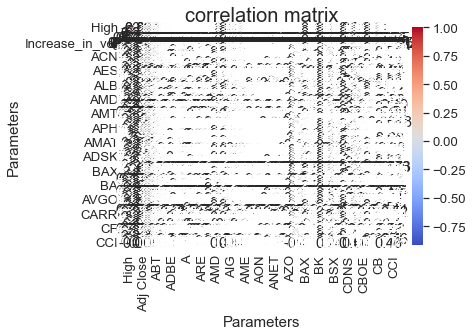

In [15]:
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
sns.set(font_scale=1.2)
plt.title('correlation matrix',fontsize=20)
plt.xlabel('Parameters',fontsize=15)
plt.ylabel('Parameters',fontsize=15)
plt.show()


In [17]:
import numpy as np
corr_matrix[:]=np.where(corr_matrix==1, 0, corr_matrix)
corr_matrix

,High,Low,Open,Close,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av,AOS,...,CBRE,CDW,CE,CF,CB,CHD,C,CFG,CAG,CCI
High,0.000000,0.999781,0.999874,0.999862,-0.043531,0.999862,0.001496,0.057959,0.995021,0.817485,...,0.878846,0.938017,0.904901,0.509909,0.829613,0.928702,0.778465,0.610692,0.697876,0.947026
Low,0.999781,0.000000,0.999843,0.999868,-0.053170,0.999868,-0.001811,0.060200,0.994449,0.819823,...,0.880966,0.940193,0.907610,0.511099,0.832085,0.929528,0.781661,0.616180,0.699651,0.947490
Open,0.999874,0.999843,0.000000,0.999730,-0.047671,0.999730,0.000220,0.051183,0.994826,0.818868,...,0.879881,0.938947,0.906504,0.510813,0.831063,0.929055,0.780437,0.614494,0.699014,0.947002
Close,0.999862,0.999868,0.999730,0.000000,-0.048478,0.000000,-0.000406,0.068255,0.994711,0.818719,...,0.879902,0.939148,0.906227,0.510313,0.830765,0.929129,0.779956,0.613222,0.698709,0.947370
Volume,-0.043531,-0.053170,-0.047671,-0.048478,0.000000,-0.048478,0.414748,-0.026523,-0.037256,-0.170031,...,-0.160153,0.100274,-0.141491,-0.234111,-0.211403,-0.152045,-0.161719,0.019359,-0.207298,-0.147565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHD,0.928702,0.929528,0.929055,0.929129,-0.152045,0.929129,-0.002074,0.046375,0.934685,0.851605,...,0.904227,0.946361,0.903121,0.639467,0.927514,0.000000,0.779118,0.449151,0.778999,0.972570
C,0.778465,0.781661,0.780437,0.779956,-0.161719,0.779956,0.000711,0.041627,0.778945,0.853509,...,0.910729,0.758248,0.910871,0.634664,0.865598,0.779118,0.000000,0.935637,0.729664,0.780753
CFG,0.610692,0.616180,0.614494,0.613222,0.019359,0.613222,0.003703,0.017076,0.612223,0.831846,...,0.727758,0.634311,0.894558,0.221748,0.803563,0.449151,0.935637,0.000000,0.403955,0.461260
CAG,0.697876,0.699651,0.699014,0.698709,-0.207298,0.698709,0.000217,0.048381,0.689613,0.925702,...,0.726599,0.402861,0.799712,0.529353,0.889384,0.778999,0.729664,0.403955,0.000000,0.753131


In [25]:
corr=corr_matrix.max()
corr.head(10)

High                     0.999874
Low                      0.999868
Open                     0.999874
Close                    0.999868
Volume                   0.414748
Adj Close                0.999868
Increase_in_vol          0.414748
Increase_in_adj_close    0.071841
Moving_av                0.995021
AOS                      0.959549
dtype: float64

In [2]:
!pip install tensorflow keras


In [20]:
features_only=read_main.copy()
features_only

,High,Low,Open,Close,Volume,Adj Close,Moving_av,Increase_in_vol,Increase_in_adj_close,MMM,...,FITB,FE,FRC,FISV,FLT,FLIR,FLS,FMC,F,Date
0,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,134.520004,0.0,0.000000,62.630104,...,7.566624,28.292646,NaN,12.120000,NaN,28.875170,27.075947,20.882460,7.041203,2009-12-31
1,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,134.209999,3076900.0,-0.620010,62.895260,...,7.853767,28.487560,NaN,12.357500,NaN,28.795774,27.786289,21.279438,7.238358,2010-01-04
2,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,134.370000,1252000.0,0.790009,62.501301,...,8.063307,28.170828,NaN,12.410000,NaN,28.866356,28.095625,21.208284,7.717158,2010-01-05
3,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,133.840000,-1673100.0,-2.440002,63.387695,...,8.109871,28.475370,NaN,12.357500,NaN,28.936930,28.871838,21.414259,8.005848,2010-01-06
4,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,133.072000,3851400.0,-2.250000,63.433144,...,8.598791,28.049007,NaN,12.300000,NaN,28.972227,29.665247,21.148357,8.210042,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2620.000000,2576.000000,2620.000000,2615.270020,3585600,2615.270020,2387.642412,-279500.0,42.590088,159.669998,...,22.040001,40.509998,111.080002,103.320000,262.410004,43.130001,29.480251,100.419998,6.550000,2020-06-16
2632,2655.000000,2631.820068,2647.500000,2640.979980,2951100,2640.979980,2400.510212,-634500.0,25.709961,159.220001,...,21.480000,40.250000,110.330002,103.150002,258.250000,41.590000,28.109999,100.580002,6.330000,2020-06-17
2633,2659.639893,2636.110107,2647.010010,2653.979980,2487800,2653.979980,2413.357812,-463300.0,13.000000,159.210007,...,21.590000,40.509998,110.779999,104.029999,261.329987,40.230000,27.870001,98.989998,6.330000,2020-06-18
2634,2697.429932,2659.000000,2678.080078,2675.010010,5773300,2675.010010,2425.998013,3285500.0,21.030029,158.149994,...,20.790001,38.980000,110.860001,100.050003,264.320007,39.959999,27.719999,100.459999,6.230000,2020-06-19


In [4]:
features_only=features_only.drop(['Open','Low','Close','High'],axis=1)
features_only

,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av,AOS,ABT,ABBV,ACN,ATVI,...,CDW,CE,CF,CB,CHD,C,CFG,CAG,CCI,Date
0,4523000,134.520004,0.0,0.000000,134.520004,4.976070,17.996279,NaN,33.262230,9.956354,...,NaN,27.468046,11.348292,34.461029,11.163175,30.026762,NaN,12.255037,30.937769,2009-12-31
1,7599900,133.899994,3076900.0,-0.620010,134.209999,5.115983,18.152946,NaN,33.719078,10.126624,...,NaN,28.460651,11.480803,33.688393,11.327529,30.843197,NaN,12.286939,31.389481,2010-01-04
2,8851900,134.690002,1252000.0,0.790009,134.370000,5.050615,18.006285,NaN,33.927479,10.144546,...,NaN,29.093880,11.667064,32.929432,11.174255,32.022488,NaN,12.340101,31.690609,2010-01-05
3,7178800,132.250000,-1673100.0,-2.440002,133.840000,5.052907,18.106277,NaN,34.288147,10.090778,...,NaN,29.410486,12.153352,32.478142,11.227811,33.020370,NaN,12.297568,31.238918,2010-01-06
4,11030200,130.000000,3851400.0,-2.250000,133.072000,5.067816,18.256275,NaN,34.256084,9.848815,...,NaN,29.564510,12.030843,32.662773,11.102233,33.111080,NaN,12.334788,30.723808,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,3585600,2615.270020,-279500.0,42.590088,2387.642412,47.880001,89.739998,96.059998,204.399994,73.000000,...,119.370003,89.900002,30.809999,129.675430,74.739998,54.450001,27.240000,34.250000,169.589996,2020-06-16
2632,2951100,2640.979980,-634500.0,25.709961,2400.510212,47.689999,90.900002,95.739998,205.199997,75.529999,...,117.180000,89.059998,30.230000,128.919998,75.370003,53.000000,26.370001,34.299999,169.449997,2020-06-17
2633,2487800,2653.979980,-463300.0,13.000000,2413.357812,47.930000,90.279999,96.230003,202.929993,76.010002,...,117.239998,88.139999,29.990000,129.649994,77.820000,53.040001,26.150000,34.240002,165.250000,2020-06-18
2634,5773300,2675.010010,3285500.0,21.030029,2425.998013,47.290001,90.680000,96.709999,201.550003,76.580002,...,116.949997,86.720001,29.889999,127.949997,77.519997,52.919998,25.350000,33.549999,170.449997,2020-06-19


In [5]:
features_only=features_only.drop(['Date'],axis=1)
features_only

,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av,AOS,ABT,ABBV,ACN,ATVI,...,CBRE,CDW,CE,CF,CB,CHD,C,CFG,CAG,CCI
0,4523000,134.520004,0.0,0.000000,134.520004,4.976070,17.996279,NaN,33.262230,9.956354,...,13.570000,NaN,27.468046,11.348292,34.461029,11.163175,30.026762,NaN,12.255037,30.937769
1,7599900,133.899994,3076900.0,-0.620010,134.209999,5.115983,18.152946,NaN,33.719078,10.126624,...,13.820000,NaN,28.460651,11.480803,33.688393,11.327529,30.843197,NaN,12.286939,31.389481
2,8851900,134.690002,1252000.0,0.790009,134.370000,5.050615,18.006285,NaN,33.927479,10.144546,...,14.150000,NaN,29.093880,11.667064,32.929432,11.174255,32.022488,NaN,12.340101,31.690609
3,7178800,132.250000,-1673100.0,-2.440002,133.840000,5.052907,18.106277,NaN,34.288147,10.090778,...,14.030000,NaN,29.410486,12.153352,32.478142,11.227811,33.020370,NaN,12.297568,31.238918
4,11030200,130.000000,3851400.0,-2.250000,133.072000,5.067816,18.256275,NaN,34.256084,9.848815,...,14.170000,NaN,29.564510,12.030843,32.662773,11.102233,33.111080,NaN,12.334788,30.723808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,3585600,2615.270020,-279500.0,42.590088,2387.642412,47.880001,89.739998,96.059998,204.399994,73.000000,...,48.369999,119.370003,89.900002,30.809999,129.675430,74.739998,54.450001,27.240000,34.250000,169.589996
2632,2951100,2640.979980,-634500.0,25.709961,2400.510212,47.689999,90.900002,95.739998,205.199997,75.529999,...,47.790001,117.180000,89.059998,30.230000,128.919998,75.370003,53.000000,26.370001,34.299999,169.449997
2633,2487800,2653.979980,-463300.0,13.000000,2413.357812,47.930000,90.279999,96.230003,202.929993,76.010002,...,47.480000,117.239998,88.139999,29.990000,129.649994,77.820000,53.040001,26.150000,34.240002,165.250000
2634,5773300,2675.010010,3285500.0,21.030029,2425.998013,47.290001,90.680000,96.709999,201.550003,76.580002,...,46.740002,116.949997,86.720001,29.889999,127.949997,77.519997,52.919998,25.350000,33.549999,170.449997


In [6]:
features_only=features_only.drop(['CFG'],axis=1)
features_only

,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av,AOS,ABT,ABBV,ACN,ATVI,...,CBOE,CBRE,CDW,CE,CF,CB,CHD,C,CAG,CCI
0,4523000,134.520004,0.0,0.000000,134.520004,4.976070,17.996279,NaN,33.262230,9.956354,...,NaN,13.570000,NaN,27.468046,11.348292,34.461029,11.163175,30.026762,12.255037,30.937769
1,7599900,133.899994,3076900.0,-0.620010,134.209999,5.115983,18.152946,NaN,33.719078,10.126624,...,NaN,13.820000,NaN,28.460651,11.480803,33.688393,11.327529,30.843197,12.286939,31.389481
2,8851900,134.690002,1252000.0,0.790009,134.370000,5.050615,18.006285,NaN,33.927479,10.144546,...,NaN,14.150000,NaN,29.093880,11.667064,32.929432,11.174255,32.022488,12.340101,31.690609
3,7178800,132.250000,-1673100.0,-2.440002,133.840000,5.052907,18.106277,NaN,34.288147,10.090778,...,NaN,14.030000,NaN,29.410486,12.153352,32.478142,11.227811,33.020370,12.297568,31.238918
4,11030200,130.000000,3851400.0,-2.250000,133.072000,5.067816,18.256275,NaN,34.256084,9.848815,...,NaN,14.170000,NaN,29.564510,12.030843,32.662773,11.102233,33.111080,12.334788,30.723808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,3585600,2615.270020,-279500.0,42.590088,2387.642412,47.880001,89.739998,96.059998,204.399994,73.000000,...,101.449997,48.369999,119.370003,89.900002,30.809999,129.675430,74.739998,54.450001,34.250000,169.589996
2632,2951100,2640.979980,-634500.0,25.709961,2400.510212,47.689999,90.900002,95.739998,205.199997,75.529999,...,101.040001,47.790001,117.180000,89.059998,30.230000,128.919998,75.370003,53.000000,34.299999,169.449997
2633,2487800,2653.979980,-463300.0,13.000000,2413.357812,47.930000,90.279999,96.230003,202.929993,76.010002,...,100.250000,47.480000,117.239998,88.139999,29.990000,129.649994,77.820000,53.040001,34.240002,165.250000
2634,5773300,2675.010010,3285500.0,21.030029,2425.998013,47.290001,90.680000,96.709999,201.550003,76.580002,...,98.750000,46.740002,116.949997,86.720001,29.889999,127.949997,77.519997,52.919998,33.549999,170.449997


In [30]:
target_only=read_main.copy()
target_only

,High,Low,Open,Close,Volume,Adj Close,Moving_av,Increase_in_vol,Increase_in_adj_close,MMM,...,FITB,FE,FRC,FISV,FLT,FLIR,FLS,FMC,F,Date
0,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,134.520004,0.0,0.000000,62.630104,...,7.566624,28.292646,NaN,12.120000,NaN,28.875170,27.075947,20.882460,7.041203,2009-12-31
1,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,134.209999,3076900.0,-0.620010,62.895260,...,7.853767,28.487560,NaN,12.357500,NaN,28.795774,27.786289,21.279438,7.238358,2010-01-04
2,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,134.370000,1252000.0,0.790009,62.501301,...,8.063307,28.170828,NaN,12.410000,NaN,28.866356,28.095625,21.208284,7.717158,2010-01-05
3,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,133.840000,-1673100.0,-2.440002,63.387695,...,8.109871,28.475370,NaN,12.357500,NaN,28.936930,28.871838,21.414259,8.005848,2010-01-06
4,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,133.072000,3851400.0,-2.250000,63.433144,...,8.598791,28.049007,NaN,12.300000,NaN,28.972227,29.665247,21.148357,8.210042,2010-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,2620.000000,2576.000000,2620.000000,2615.270020,3585600,2615.270020,2387.642412,-279500.0,42.590088,159.669998,...,22.040001,40.509998,111.080002,103.320000,262.410004,43.130001,29.480251,100.419998,6.550000,2020-06-16
2632,2655.000000,2631.820068,2647.500000,2640.979980,2951100,2640.979980,2400.510212,-634500.0,25.709961,159.220001,...,21.480000,40.250000,110.330002,103.150002,258.250000,41.590000,28.109999,100.580002,6.330000,2020-06-17
2633,2659.639893,2636.110107,2647.010010,2653.979980,2487800,2653.979980,2413.357812,-463300.0,13.000000,159.210007,...,21.590000,40.509998,110.779999,104.029999,261.329987,40.230000,27.870001,98.989998,6.330000,2020-06-18
2634,2697.429932,2659.000000,2678.080078,2675.010010,5773300,2675.010010,2425.998013,3285500.0,21.030029,158.149994,...,20.790001,38.980000,110.860001,100.050003,264.320007,39.959999,27.719999,100.459999,6.230000,2020-06-19


In [19]:
features_only.describe()


,Volume,Adj Close,Increase_in_vol,Increase_in_adj_close,Moving_av,AOS,ABT,ABBV,ACN,ATVI,...,CBRE,CDW,CE,CF,CB,CHD,C,CFG,CAG,CCI
count,2.636000e+03,2636.000000,2.636000e+03,2636.000000,2636.000000,2636.000000,2636.000000,1881.000000,2636.000000,2636.000000,...,2636.000000,1759.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,1446.000000,2636.000000,2636.000000
mean,4.555475e+06,742.517925,-8.901893e+02,0.974522,720.517694,29.845338,41.761769,59.005353,96.335494,31.685130,...,31.474188,59.886872,62.976458,31.135187,93.465239,37.598617,47.695961,29.013771,24.221882,73.018484
std,2.839655e+06,647.007357,2.354572e+06,19.053406,624.705902,18.126322,20.629844,19.272583,49.856332,21.224434,...,12.023960,32.746971,27.947967,11.216159,36.224090,18.685891,13.485065,7.263952,7.922023,33.354705
min,8.813000e+05,108.610001,-3.128330e+07,-187.959961,120.187200,4.861389,15.795899,24.647196,29.462990,8.970576,...,12.160000,17.090305,20.448997,7.407187,32.478142,11.030218,20.974964,15.053624,11.731386,27.593575
25%,2.813150e+06,233.779999,-8.201000e+05,-3.385010,223.991900,10.805784,26.618517,44.686775,53.732716,11.309645,...,21.905000,33.943510,40.198782,23.833406,57.444864,22.048295,38.280206,21.661011,15.725048,49.170375
50%,3.847350e+06,396.199997,-8.970000e+04,0.469971,383.799700,29.245105,37.455332,53.481598,83.955395,22.361982,...,29.799999,50.036560,55.070301,29.430576,94.895103,37.669867,45.532486,31.219952,23.669812,67.477772
75%,5.348600e+06,1121.287537,7.247750e+05,5.174999,998.113549,46.030257,52.739918,76.251663,137.510292,47.835396,...,38.882501,82.774612,89.738543,40.055429,127.301262,47.742672,58.977239,34.564024,31.677191,95.026573
max,4.242110e+07,2703.360107,2.741770e+07,138.039917,2439.210015,64.965729,98.000000,108.304718,214.950119,82.184952,...,64.250000,143.717850,125.668579,58.228470,163.100861,79.497925,80.515900,43.757587,38.114460,173.356766


In [31]:
target_only=target_only.loc[:,('Open','Low','High','Close')]
target_only

,Open,Low,High,Close
0,137.089996,134.520004,137.279999,134.520004
1,136.250000,133.139999,136.610001,133.899994
2,133.429993,131.809998,135.479996,134.690002
3,134.600006,131.649994,134.729996,132.250000
4,132.009995,128.800003,132.320007,130.000000
...,...,...,...,...
2631,2620.000000,2576.000000,2620.000000,2615.270020
2632,2647.500000,2631.820068,2655.000000,2640.979980
2633,2647.010010,2636.110107,2659.639893,2653.979980
2634,2678.080078,2659.000000,2697.429932,2675.010010


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features_only,target_only, test_size=0.3)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


def model():
    mod=Sequential()
    mod.add(Dense(32, kernel_initializer='normal', input_dim=86,activation='relu'))
    mod.add(Dense(64, kernel_initializer='normal', activation='relu'))
    mod.add(Dense(128, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(256, kernel_initializer='normal',activation='relu'))
    mod.add(Dense(4,kernel_initializer='normal',activation='linear'))
    mod.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy','mean_absolute_error'])
    mod.summary()
    return mod
print(model())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2784      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 47,268
Trainable params: 47,268
Non-trainable params: 0
_________________________________________________________________


In [11]:
!pip install scikeras --user



In [37]:
import numpy as np
X_train = np.array(masked_arr).astype('float32')
print(np.isnan(masked_arr).any())
num_nans = np.sum(np.isnan(masked_arr))
num_nans

NameError: name 'masked_arr' is not defined

In [36]:
print(np.isnan(masked_arr).any())
num_nans = np.sum(np.isnan(y_train))
num_nans

NameError: name 'masked_arr' is not defined

In [42]:
masked_arr = np.ma.masked_invalid(X_train)
print(len(masked_arr))



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [34]:
print(len(X_train))
print(len(masked_arr))
print(len(y_train))
print(np.isinf(X_train).any())
print(masked_arr.size)

1845


NameError: name 'masked_arr' is not defined

In [39]:
mean_values = np.nanmean(masked_arr, axis=0)
masked_arr = np.nan_to_num(masked_arr, nan=mean_values)

NameError: name 'masked_arr' is not defined

In [40]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
regressor = KerasRegressor(build_fn=model, batch_size=16,epochs=2000)
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='Regressor_model.h5',
                                           monitor='mean_absolute_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto')
results=regressor.fit(masked_arr,y_train,callbacks=[callback])

NameError: name 'masked_arr' is not defined

In [20]:

b=features_only.isnull().sum()

b

Volume                   0
Adj Close                0
Increase_in_vol          0
Increase_in_adj_close    0
Moving_av                0
                        ..
CB                       0
CHD                      0
C                        0
CAG                      0
CCI                      0
Length: 86, dtype: int64

In [37]:
print(masked_arr)

[[4807200.0 574.47998046875 -2977300.0 ... 38.301170349121094
  26.849258422851562 67.25108337402344]
 [6320600.0 1544.9200439453125 1569800.0 ... 66.01287841796875
  33.32424545288086 100.6857681274414]
 [4694900.0 179.02999877929688 -3371800.0 ... 25.103940963745117
  15.405488967895508 35.15367889404297]
 ...
 [2570600.0 1587.280029296875 -2506900.0 ... 67.87232208251953
  35.717411041259766 95.17784881591797]
 [2994800.0 221.30999755859375 195600.0 ... 23.974884033203125
  15.268855094909668 45.9470329284668]
 [1929500.0 1801.3800048828125 -886800.0 ... 61.89815902709961
  28.103984832763672 139.9801025390625]]


In [52]:
print(np.isnan(masked_X_test).any())

NameError: name 'masked_X_test' is not defined

In [51]:
masked_X_test=np.ma.masked_invalid(X_test)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
mean_masked_x_test=np.nanmean(masked_X_test,axis=0)
masked_X_test_2=np.nan_to_num(masked_X_test,nan=mean_masked_x_test)

NameError: name 'masked_X_test' is not defined

In [49]:
masked_x_test_2=masked_X_test_2.astype('float32')

NameError: name 'masked_X_test_2' is not defined

In [43]:
y_pred=regressor.predict(masked_x_test_2)
import numpy as np
y_pred_mod=[]
y_test_mod=[]
for i in range(0,4):
    j=0
    y_pred_temp=[]
    y_test_temp=[]
    while(j<len(y_test)):
        try:
            
            y_pred_temp.append(y_pred[j][i])
            y_test_temp.append(y_test[j][i])
        except KeyError:
            pass
        j+=1
    y_pred_mod.append(np.array(y_pred_temp))
    y_test_mod.append(np.array(y_test_temp))

NameError: name 'masked_x_test_2' is not defined

In [50]:
y_pred_mod

[array([ 222.07132, 1901.6006 ,  260.574  , 1832.1833 , 1863.2783 ,
        1978.0719 , 1943.9033 ,  217.00435,  315.20657, 1823.3029 ,
        1694.8705 ,  524.9591 ,  236.71037, 1736.6943 , 1487.2924 ,
         148.35977,  352.40295, 1924.6857 ,  345.37262,  261.70438,
         234.81801,  554.6456 ,  381.645  ,  312.01178,  303.57065,
        1866.8552 ,  536.6259 ,  255.54639,  326.82452,  526.1048 ,
         276.87854,  252.91206,  398.15292,  371.06918, 1963.5728 ,
        1906.3575 ,  384.89905,  528.8011 ,  777.9264 ,  323.30377,
         157.07265, 1919.7698 ,  325.7327 , 1925.3252 ,  253.89195,
         366.25073,  385.27924, 1764.2418 ,  216.95314,  182.13321,
         158.0369 ,  184.81204,  284.17773, 1167.4772 ,  335.52396,
        1004.41077,  266.60706, 1676.6149 ,  271.95157,  974.81525,
         225.0986 ,  274.61646,  255.6915 ,  679.0779 , 1594.9257 ,
        1502.6346 ,  184.42885,  192.23586, 1638.3384 ,  156.82982,
         379.23035,  706.1149 , 1791.1282 , 1869

In [52]:
y_test_temp

[]

ValueError: x and y must be the same size

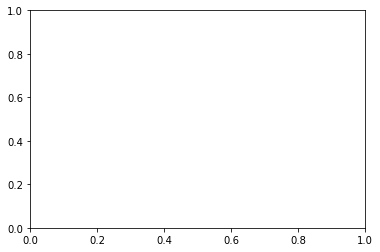

In [54]:
import matplotlib.pyplot as plt

# Assuming y_test_mod and y_pred_mod are already defined as lists
# Flatten the lists to 1D using a list comprehension
y_test_flat = [item for sublist in y_test_mod for item in sublist]
y_pred_flat = [item for sublist in y_pred_mod for item in sublist]

# Plot the data
plt.scatter(y_test_flat, y_pred_flat)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.show()


In [55]:
import matplotlib.pyplot as plt

# Assuming y_test_mod and y_pred_mod are already defined as lists
# Flatten the lists to 1D using a list comprehension
y_test_flat = [item for sublist in y_test_mod for item in sublist]
y_pred_flat = [item for sublist in y_pred_mod for item in sublist]

# Make sure both arrays have the same length
if len(y_test_flat) == len(y_pred_flat):
    # Plot the data
    plt.scatter(y_test_flat, y_pred_flat)
    plt.xlabel("Measured")
    plt.ylabel("Predicted")
    plt.show()
else:
    print("Error: x and y arrays have different lengths!")


Error: x and y arrays have different lengths!
